In [1]:
%load_ext autoreload
%autoreload 2

import sklearn.datasets
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.nn import Linear, Sigmoid, Softmax
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch import FloatTensor, LongTensor

from show_resoult import show_resoult
from WineNet import WineNet
from gradient_descent import gradient_descent

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True 

In [3]:
# загрузим данные
wine = sklearn.datasets.load_wine()

columns = ['f_{}'.format(i) for i in range(13)]
df = pd.DataFrame(wine.data, columns=columns)

df['target'] = wine.target
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:,:5],
    wine.target,
    test_size=0.3,
    shuffle=True)

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
# обернем данные в torch тензоры
X_train = FloatTensor(X_train) 
X_test = FloatTensor(X_test)
y_train = LongTensor(y_train)
y_test = LongTensor(y_test)
# зададим параметры нейронной сети
n_input = X_train.shape[1]
n_hidden = 100
n_classes = y_test.unique().shape[0]

In [5]:
# инициализируем сеть, функцию ошибки и метод оптимизации
wine_net = WineNet(n_input, n_hidden, n_classes)
loss_function = CrossEntropyLoss()

In [16]:
# градиентный спуск
batch_size = 50
num_epoch = 40000
optimizer = Adam(wine_net.parameters(), lr=1.0e-4)
history = gradient_descent(wine_net,
    X_train, y_train, X_test, y_test,
    batch_size, num_epoch, loss_function, optimizer)

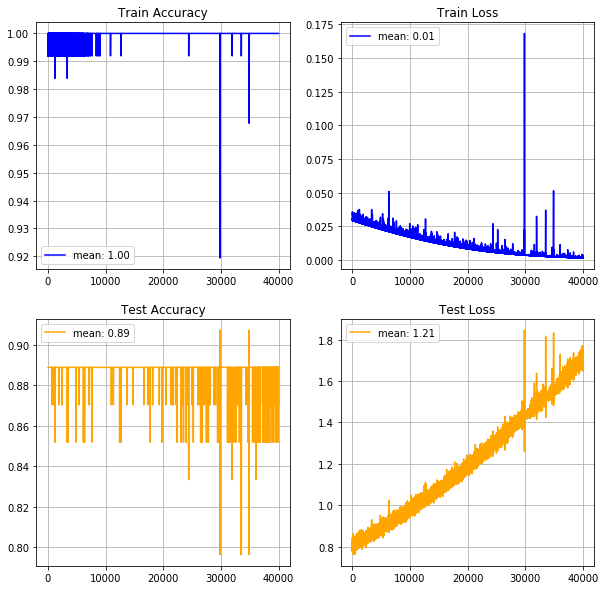

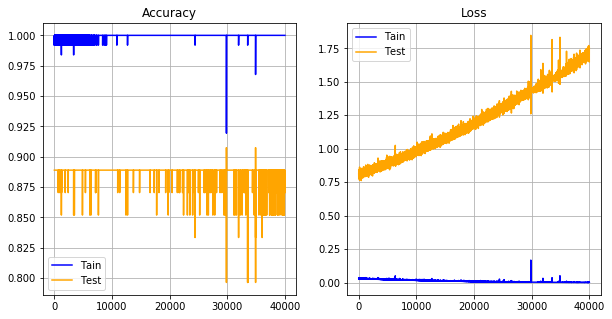

In [17]:
show_resoult(history)